# Исследование распределения ожидаемой продолжительности жизни

In [22]:
import sys
# Добавим папку проекта в список системных директорий, чтобы Python видел путь к папке utils
sys.path.append('..')

In [23]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns 

from utils.constants import F
from utils.display_content import (
    dislay_some_fields_description,
    display_field_description,
)
from utils.prepare_data import (
    get_predictors,
)
from utils.graphics import (
    display_corellation_by_target,
)

from warnings import simplefilter
simplefilter('ignore')

In [24]:
# Загрузим таблицу
data = pd.read_csv('../data/cumulative_life_expectancy_prepared.csv')

data.head()

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period,AdultMortality,Homicides,MaternalMortality,AdultNcdMortality,AdultNcdMortality117,...,BmiTeenagerOverweight2,Sanitation,DrinkingWater,HealthCareCosts,HealthCareCostsGdp,HealthCareCostsPerCapita,GdpPerCapita,Population,Schooling,LifeExpectancy
0,AFR,Africa,AGO,Angola,2000,34.56,0.01331,0.859921,30.5,0.028126,...,0.99,27.56,41.14,2.74,1.11,7.66,563.733796,16194869.0,5.027188,49.37
1,AFR,Africa,AGO,Angola,2001,33.86,0.01310,0.799641,29.7,0.027503,...,1.07,28.99,42.25,5.97,2.05,13.35,533.586202,16747208.0,5.092250,50.06
2,AFR,Africa,AGO,Angola,2002,32.51,0.01288,0.758272,29.4,0.027049,...,1.14,30.42,43.38,4.19,1.31,11.54,882.147847,17327699.0,5.157312,51.06
3,AFR,Africa,AGO,Angola,2003,32.16,0.01265,0.676496,29.3,0.026962,...,1.22,31.86,44.36,4.26,1.47,14.55,992.698979,17943712.0,5.222375,51.74
4,AFR,Africa,AGO,Angola,2004,32.24,0.01229,0.594192,29.0,0.026300,...,1.31,33.29,45.35,5.66,1.69,21.36,1266.210864,18600423.0,5.287437,52.36


## Динамика изменения ожидаемой продолжительности жизни за 2000-2020 гг.

Посмотрим, как менялась ожидаемая продолжительность жизни с 2000 по 2020 гг.

In [25]:
px.histogram(
    data, 
    x=F.LifeExpectancy.value, 
    animation_frame=F.Period.value, 
    nbins=60,
    title='Ожидаемая продолжительность жизни за период с 2000 по 2020 годы',
)

Как видно по анимации, ожидаемая продолжительность жизни стремится к увеличению
с 2000 по 2020 гг. (график гистограммы сдвигается вправо).

Посмотрим на характеристики распределения ожидаемой продолжительности жизни за этот период.

In [26]:
print('Характеристики распределения ожидаемой продолжительности жизни за 2000-2020 гг.')

# Сгруппируем данные по году 
describe_data = data.groupby(F.Period.value) \
    [F.LifeExpectancy.value].describe() # и посмотрим характеристики распределения по каждому из годов
    
describe_data

Характеристики распределения ожидаемой продолжительности жизни за 2000-2020 гг.


,count,mean,std,min,25%,50%,75%,max
Period,,,,,,,,
2000,181.0,67.022541,9.822441,44.23,59.52,70.56,74.39,81.53
2001,181.0,67.353481,9.773239,44.47,60.03,70.61,74.93,81.84
2002,181.0,67.581823,9.693813,43.64,60.60,71.06,74.99,82.10
2003,181.0,67.815138,9.596958,42.59,60.80,70.96,74.94,82.14
2004,181.0,68.151215,9.507951,41.87,61.57,71.03,75.26,82.37
2005,181.0,68.499834,9.325303,41.78,61.99,71.36,75.37,82.24
2006,181.0,68.951436,9.145246,42.39,63.07,72.01,75.55,82.59
2007,181.0,69.313315,8.894636,43.60,63.38,72.07,75.52,82.76
2008,181.0,69.667127,8.705904,44.28,63.66,72.04,75.93,82.83


Отобразим эти значения на графике.

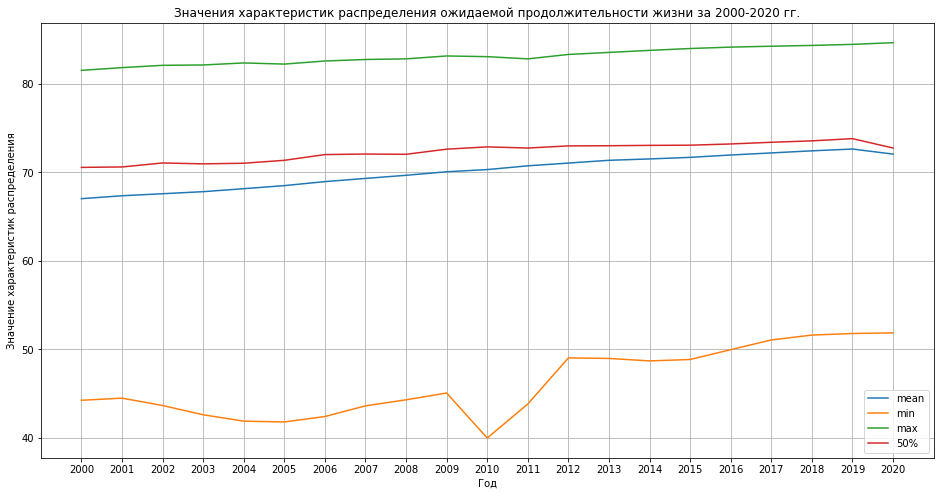

In [27]:
describe_data[['mean', 'min', 'max', '50%']].plot(
    figsize=(16, 8),
    xticks=list(range(2000, 2021)),
    xlabel='Год',
    ylabel='Значение характеристик распределения',
    title='Значения характеристик распределения ожидаемой продолжительности жизни за 2000-2020 гг.',
    grid=True,
);

Видно, что за 2000-2020 гг. значения характеристик в целом имеют тенденцию к росту.\
В 2010-м году по какой-то причине минимальная продолжительность жизни имеет самое низкое значение.\
И в 2020 г. среднее и медиана немного ушли вниз. Возможно, это связано с COVID-19. 

Среднее и медиана расположены довольно близко.

## Ожидаемая продолжительность жизни в странах и регионах

Посмотрим, как ожидаемая продолжительность жизни распределяется по странам.

In [28]:
fig = px.choropleth(
    data, 
    locations=F.SpatialDimValueCode.value, 
    color=F.LifeExpectancy.value,
    hover_name=F.Location.value,
    projection='natural earth',
    animation_frame=F.Period.value,
    #color_continuous_scale='blues',
    width=1000,
    height=700,
    title='Ожидаемая продолжительность жизни в различных странах за период с 2000 по 2020 годы',
)

fig.show()

Посмотрим, какая ожидаемая продолжительность жизни в разных странах была в 2020 г.

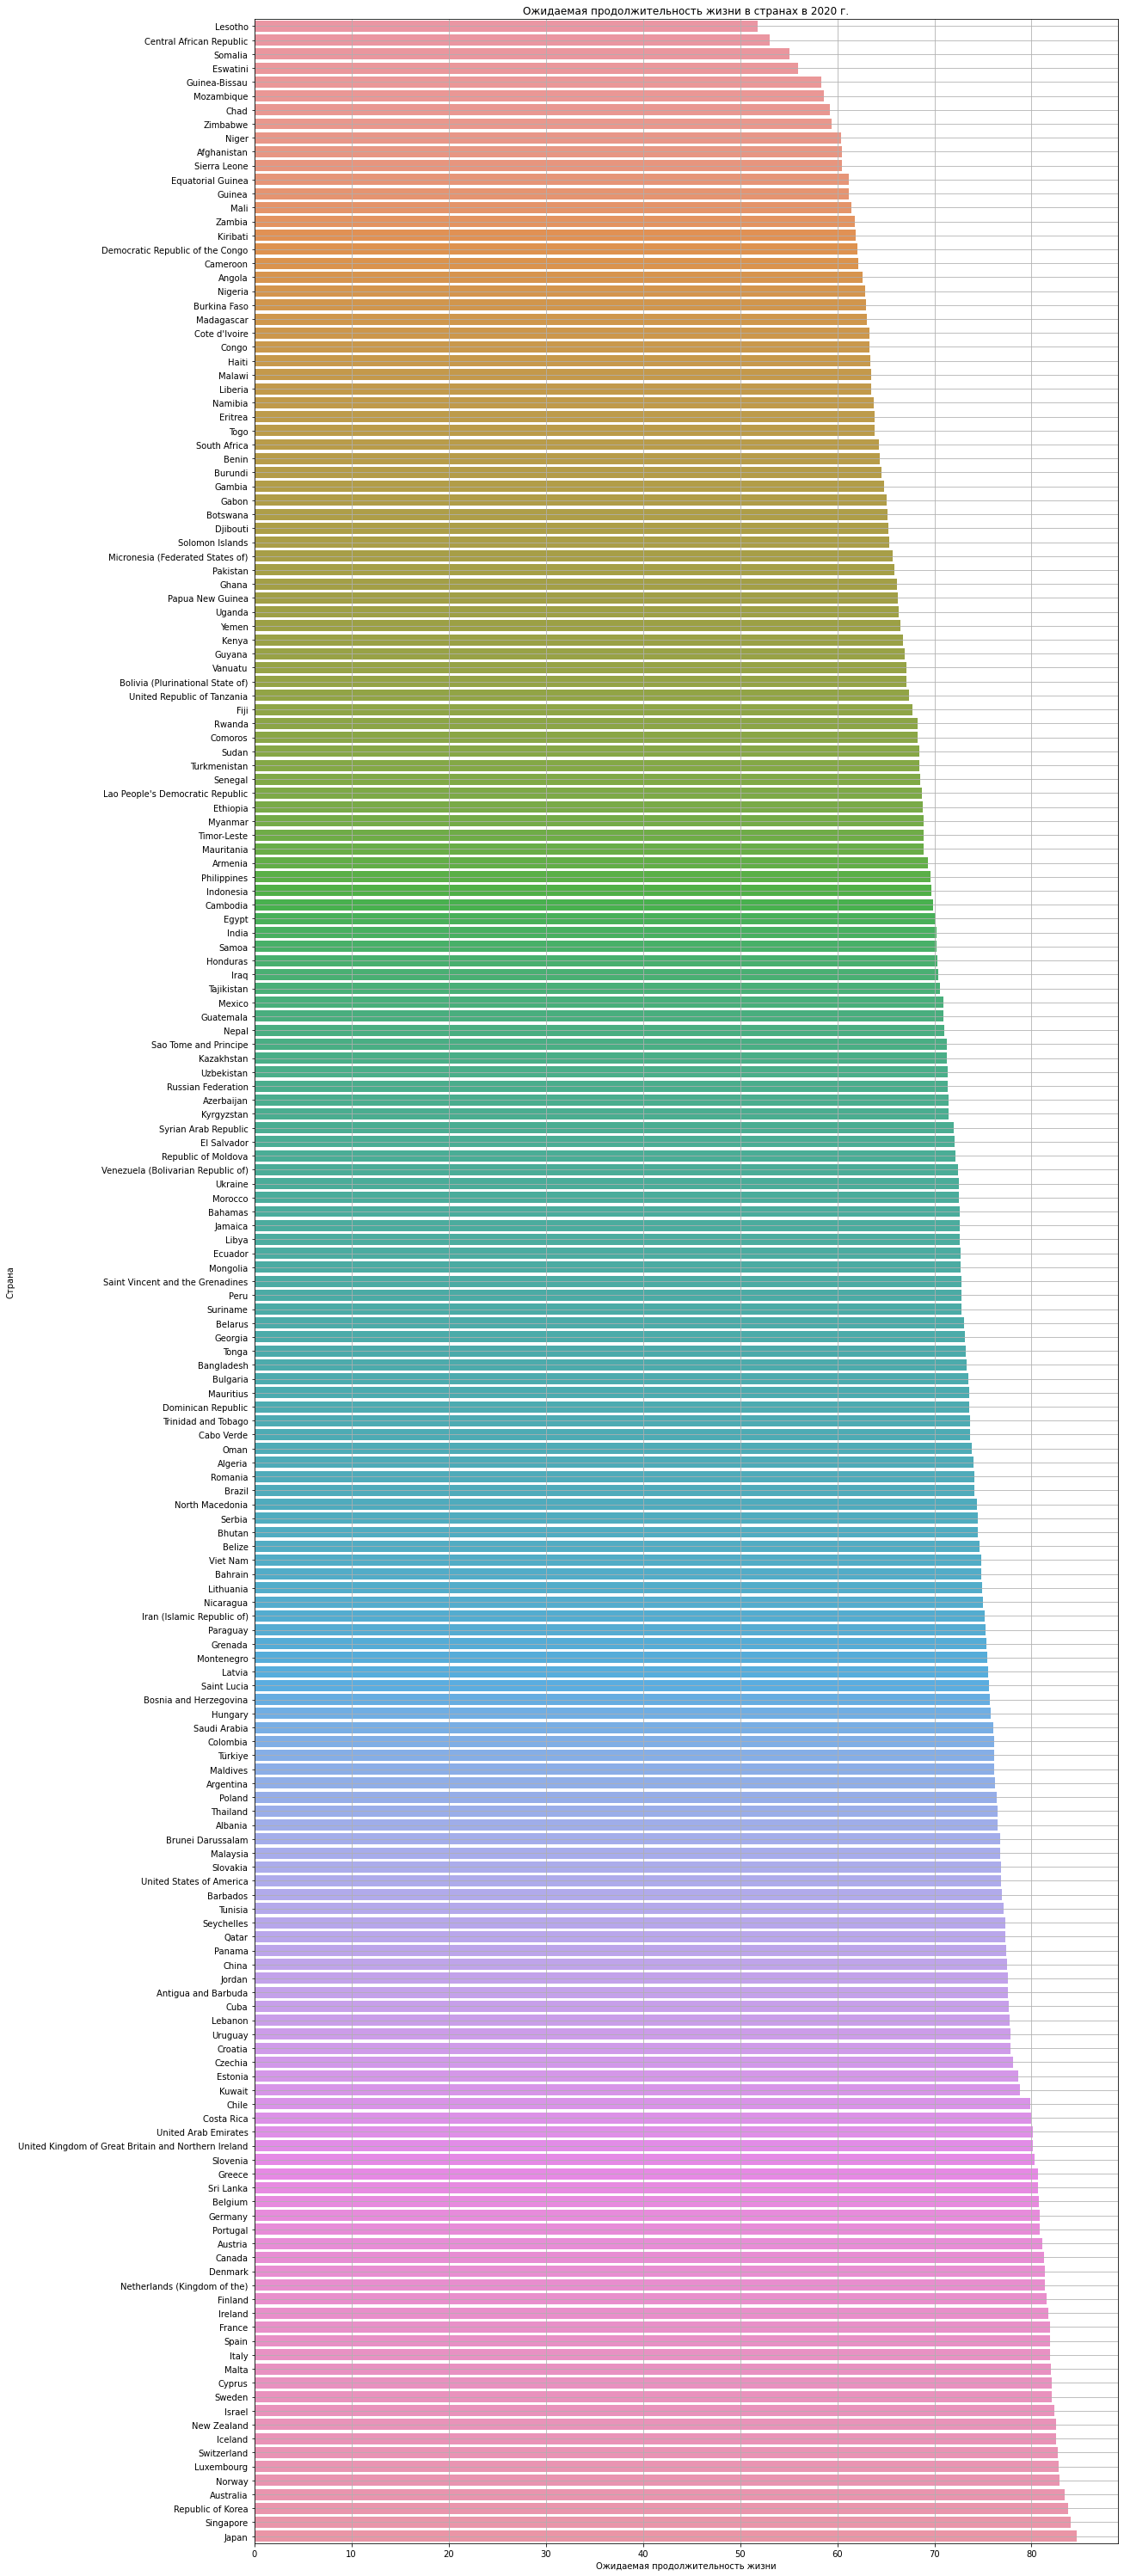

In [29]:
fig = plt.figure(figsize=(18, 54))

data_2020 = data[data[F.Period.value] == 2020].sort_values(by=F.LifeExpectancy.value)

ax = sns.barplot(
    data=data_2020,
    x=F.LifeExpectancy.value,
    y=F.Location.value,
)

ax.set_title('Ожидаемая продолжительность жизни в странах в 2020 г.')
ax.set_xlabel('Ожидаемая продолжительность жизни')
ax.set_ylabel('Страна')
ax.grid();

Наибольшая ожидаемая продолжительность жизни в Японии и наименьшая в Лесото.\
Посмотрим на значения для первых и последних 5 стран в 2020 г.

In [30]:
data_2020[[F.Location.value, F.LifeExpectancy.value]].head()

,Location,LifeExpectancy
503,Lesotho,51.85
125,Central African Republic,53.08
2036,Somalia,55.13
797,Eswatini,55.97
419,Guinea-Bissau,58.38


In [31]:
data_2020[[F.Location.value, F.LifeExpectancy.value]].tail()

,Location,LifeExpectancy
2876,Norway,82.84
3380,Australia,83.37
3548,Republic of Korea,83.80
3695,Singapore,84.00
3485,Japan,84.66


Посмотрим, в какой стране была наименьшая минимальная ожидаемая продолжительность жизни за 2010 г.

In [32]:
data_2010 = data[data[F.Period.value] == 2010].sort_values(by=F.LifeExpectancy.value)

data_2010[[F.Location.value, F.LifeExpectancy.value]].head()

,Location,LifeExpectancy
1354,Haiti,39.96
787,Eswatini,46.39
493,Lesotho,48.57
115,Central African Republic,49.20
2026,Somalia,49.53


Наименьшее значение видим на Гаити, [в 2010 г. там произошло землятресение](https://ru.wikipedia.org/wiki/%D0%97%D0%B5%D0%BC%D0%BB%D0%B5%D1%82%D1%80%D1%8F%D1%81%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BD%D0%B0_%D0%93%D0%B0%D0%B8%D1%82%D0%B8_(2010)).
> По официальным данным на 18 марта 2010 года число погибших составило 222 570 человек, \
получивших ранения — 311 тыс. человек, \
пропавших без вести 869 человек.

Посмотрим, как ожидаемая продолжительность жизни распределена по регионам.

In [33]:
# Сгруппируем данные по регионам и возьмем среднее по каждому году
regions_data = data.groupby(by=[F.ParentLocation.value, F.Period.value]).agg(
    MeanRegionLifeExpectancy=('LifeExpectancy', 'mean')
)
# Сбросим индекс
regions_data.reset_index(inplace=True)
regions_data.head()

,ParentLocation,Period,MeanRegionLifeExpectancy
0,Africa,2000,54.279348
1,Africa,2001,54.690435
2,Africa,2002,55.043696
3,Africa,2003,55.416304
4,Africa,2004,56.006739


In [34]:
# Добавим в основную таблицу столбец `MeanRegionLifeExpectancy` 
data = data.merge(
    regions_data,
    on=['ParentLocation', 'Period'],
    how='left',
)

data.head()

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period,AdultMortality,Homicides,MaternalMortality,AdultNcdMortality,AdultNcdMortality117,...,Sanitation,DrinkingWater,HealthCareCosts,HealthCareCostsGdp,HealthCareCostsPerCapita,GdpPerCapita,Population,Schooling,LifeExpectancy,MeanRegionLifeExpectancy
0,AFR,Africa,AGO,Angola,2000,34.56,0.01331,0.859921,30.5,0.028126,...,27.56,41.14,2.74,1.11,7.66,563.733796,16194869.0,5.027188,49.37,54.279348
1,AFR,Africa,AGO,Angola,2001,33.86,0.01310,0.799641,29.7,0.027503,...,28.99,42.25,5.97,2.05,13.35,533.586202,16747208.0,5.092250,50.06,54.690435
2,AFR,Africa,AGO,Angola,2002,32.51,0.01288,0.758272,29.4,0.027049,...,30.42,43.38,4.19,1.31,11.54,882.147847,17327699.0,5.157312,51.06,55.043696
3,AFR,Africa,AGO,Angola,2003,32.16,0.01265,0.676496,29.3,0.026962,...,31.86,44.36,4.26,1.47,14.55,992.698979,17943712.0,5.222375,51.74,55.416304
4,AFR,Africa,AGO,Angola,2004,32.24,0.01229,0.594192,29.0,0.026300,...,33.29,45.35,5.66,1.69,21.36,1266.210864,18600423.0,5.287437,52.36,56.006739


In [35]:
# Отобразим данные по регионам на графике
fig = px.choropleth(
    data, 
    locations=F.SpatialDimValueCode.value, 
    color='MeanRegionLifeExpectancy',
    hover_name=F.ParentLocation.value,
    projection='natural earth',
    animation_frame=F.Period.value,
    #color_continuous_scale='blues',
    width=1000,
    height=700,
    title='Ожидаемая продолжительность жизни в регионах за период с 2000 по 2020 годы',
)

fig.show()

Отобразим на графике изменения средней ожидаемой продолжительности жизни за 2000-2020 гг. по каждому региону.

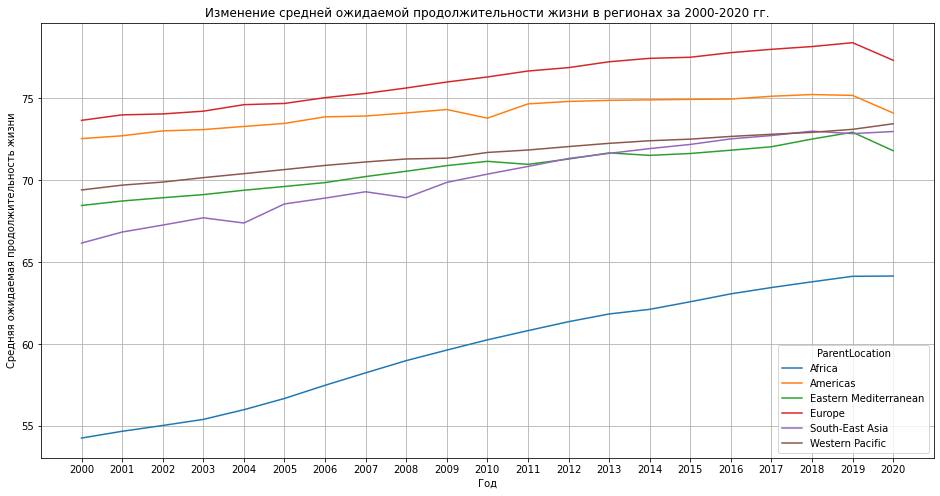

In [36]:
regions_data.pivot_table(
    index=F.Period.value,
    columns=F.ParentLocation.value,
    values='MeanRegionLifeExpectancy'
).plot(
    figsize=(16, 8),
    xticks=list(range(2000, 2021)),
    xlabel='Год',
    ylabel='Средняя ожидаемая продолжительность жизни',
    title='Изменение средней ожидаемой продолжительности жизни в регионах за 2000-2020 гг.',
    grid=True,
);

Наблюдается тенденция к росту во всех регионах.\
В Америке, Европе и Восточном Средиземноморье в 2020 г. наблюдается тенденция к снижению.\
Скорее всего это связано с COVID-19.

Сравним среднюю ожидаемую продолжительность жизни по всем регионам.

In [37]:
regions_mean_data = regions_data.groupby(by=[F.ParentLocation.value])\
    .agg('mean')[['MeanRegionLifeExpectancy']]\
    .sort_values('MeanRegionLifeExpectancy')\
    .reset_index()

regions_mean_data

,ParentLocation,MeanRegionLifeExpectancy
0,Africa,59.724855
1,South-East Asia,70.162381
2,Eastern Mediterranean,70.726372
3,Western Pacific,71.557302
4,Americas,74.141443
5,Europe,76.138610


Отобразим полученные значения на графике.

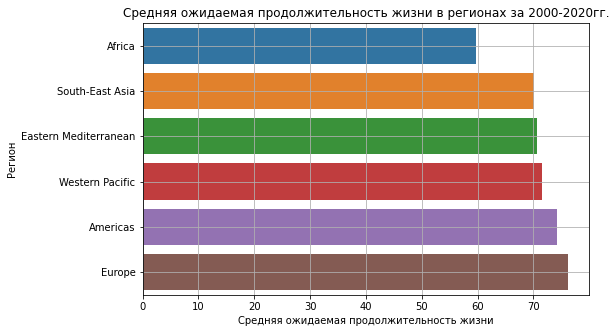

In [38]:
fig = plt.figure(figsize=(8, 5))

ax = sns.barplot(
    data=regions_mean_data,
    x='MeanRegionLifeExpectancy',
    y=F.ParentLocation.value,
)

ax.set_title('Средняя ожидаемая продолжительность жизни в регионах за 2000-2020гг.')
ax.set_xlabel('Средняя ожидаемая продолжительность жизни')
ax.set_ylabel('Регион')
ax.grid();

Наименьшая ожидаемая продолжительность жизни в Африке, наибольшая в Европе.

## Корреляция целевой переменной с другими факторами

Оставим в таблице только предикторы и посмотрим на их корреляцию с целевой переменной.

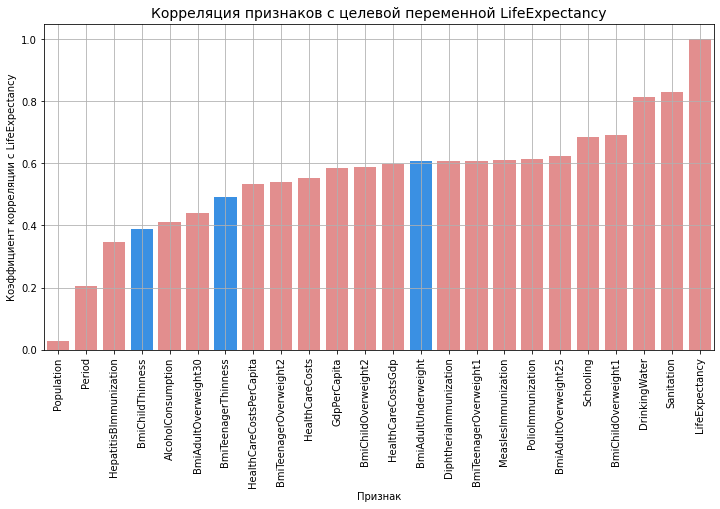

In [39]:
# Поля с предикторами
predictors = get_predictors(data)
# Список полей, для который будем рассматривать корреляцию
fields = predictors + [F.LifeExpectancy.value]

# Построим график корреляции признаков с целевой переменной
display_corellation_by_target(data[fields])

Наибольшую корреляцию с целевой переменной имеет поле `Sanitation`.

In [40]:
display_field_description(F.Sanitation.value)

`Sanitation` - Население, пользующееся как минимум базовыми услугами санитарии (%)

Большинство признаков имеют положительную корреляцию с целевой переменной.\
Отрицательную корреляцию имеют только признаки, связанные с недостаточной массой тела.

In [41]:
dislay_some_fields_description([
    F.BmiAdultUnderweight.value,
    F.BmiTeenagerThinness.value,
    F.BmiChildThinness.value,
])

**Описание полей:**

- `BmiAdultUnderweight` - Распространенность недостаточного веса среди взрослых, ИМТ < 18,5 (стандартизированная по возрасту оценка) (%)

- `BmiTeenagerThinness` - Распространенность худобы среди подростков 10-19 лет, ИМТ < -2 стандартных отклонений ниже медианы (грубая оценка) (%)

- `BmiChildThinness` - Распространенность худобы среди детей 5-9 лет, ИМТ < -2 стандартных отклонений ниже медианы (грубая оценка) (%)

## Выводы

- В целом, есть тенденция к росту средней ожидаемой продолжительности жизни за рассматриваемый период.
- Наименьшая продолжительность жизни наблюдается в Африке и наибольшая в Европе.
- Среди стран по наибольшей продолжительности жизни лидирует Япония.
- Наибольшую корреляцию с целевой переменной имеет поле `Sanitation` (население, пользующееся как минимум базовыми услугами санитарии (%)) и составляет примерно 0.8.
- Отрицательную корреляцию с ожидаемой продолжительностью жизни имеют признаки, связанные с недостаточной массой тела.